# Métricas de Clustering

Determinar un número óptimo de clusters ($k$) es un paso importante para usar algoritmos no supervisados de forma efectiva. Existen diferentes métodos que pueden ser usados para estimar el valor óptimo de $k$, incluyendo los siguientes:

1. **Método del codo (Elbow Method)**: consiste en trazar la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado para diferentes valores de $k$. En este método, buscamos el valor de $k$ donde la disminución en la suma de las distancias al cuadrado se ralentiza y forma una curva similar a un codo. Este valor de $k$ se considera como el número óptimo de clústeres.
1. **Método de la Silueta (Silhouette Method)**: consiste en calcular el coeficiente de silueta para diferentes valores de $k$. Este coeficiente es una medida que evalúa cuán parecido está un punto de datos a su clúster asignado en comparación con los otros clústeres. Básicamente, se cuantifica qué tan bien se agrupa un punto con respecto a su propio clúster en comparación con otros clústeres cercanos. Al probar diferentes valores de $k$ y calcular los coeficientes de silueta correspondientes, podemos determinar qué valor de $k$ maximiza el coeficiente de silueta promedio.


## 1. Métricas de Evaluación

En esta segunda parte, vamos a trabajar con las métricas para determinar la bondad del proceso de clustering. Primero importamos todas las librerias que vamos a usar.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

Ahora vamos a generar nuevamente datasets. Recuerden que estos son datasets sintéticos, de los cuales ya sabemos de antemano la etiqueta que traen. El proceso de clustering nos permite identificar grupos que compartirían etiquetas cuando NO las conocemos y, en algunos casos, tampoco conocemos la cantidad de clases.

1. Generamos dos dataset del tipo Blobs. Ambos con 2000 samples y 2 features. Uno con mayor desviación que el otro.

In [ ]:
n_samples = 2000
n_centros = 8

X1, y1 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.3, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.6, n_features=2, random_state=2)

# Preparamos un dataset con clusters que no sean simétricos
random_state = 170
X, y3 = make_blobs(n_samples=n_samples, centers=n_centros, cluster_std=0.6, random_state=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X3 = np.dot(X, transformation)

2. Graficamos los datasets

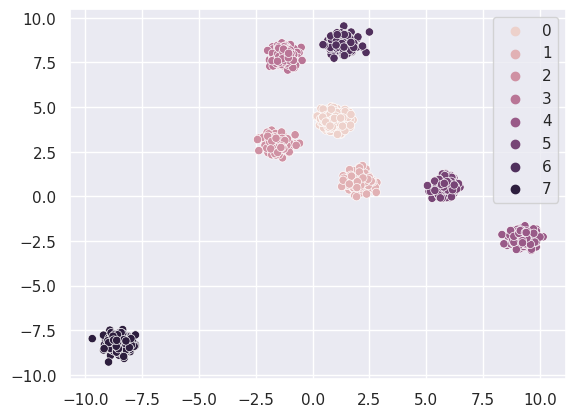

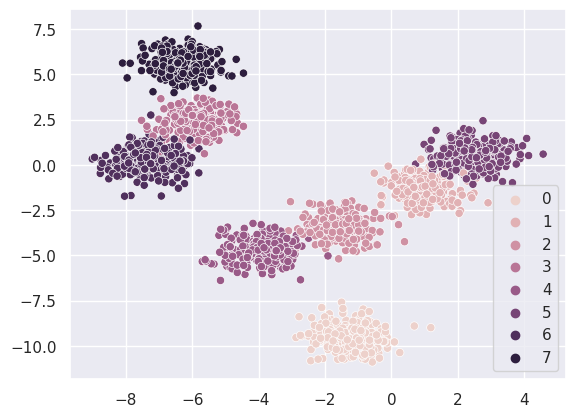

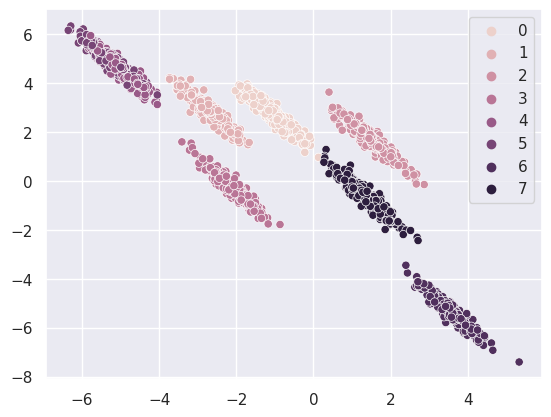

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1, legend ='full')
plt.show()
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2, legend ='full')
plt.show()
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3, legend ='full')
plt.show()

### 1.1 Método del codo (Elbow Method)

Vamos a evaluar las particiones que realizamos mediante KMeans usando la distancia al centroide (Elbow Method). La idea es que al variar el número de clúster K en el modelo, el valor de la distancia media de los datos al centroide más cercano va a variar. Queremos graficar esa curva para elegir el número de particiones óptimos con el metodo del codo.

3. Preparamos una lista con las distancias medias a los centroides en el dataset 1. Vamos a probar un número de clústers que va de 2 a 14.

In [ ]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
lista_distancias_medias = []
# Entrenamos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    # Tomamos la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Calculamos la distancia media y agregamos a la lista
    distancia_media = np.divide(distancia_total,X1.shape[0])
    lista_distancias_medias.append(distancia_media)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

4. Graficamos la distancia media en función del núemro de clústers.

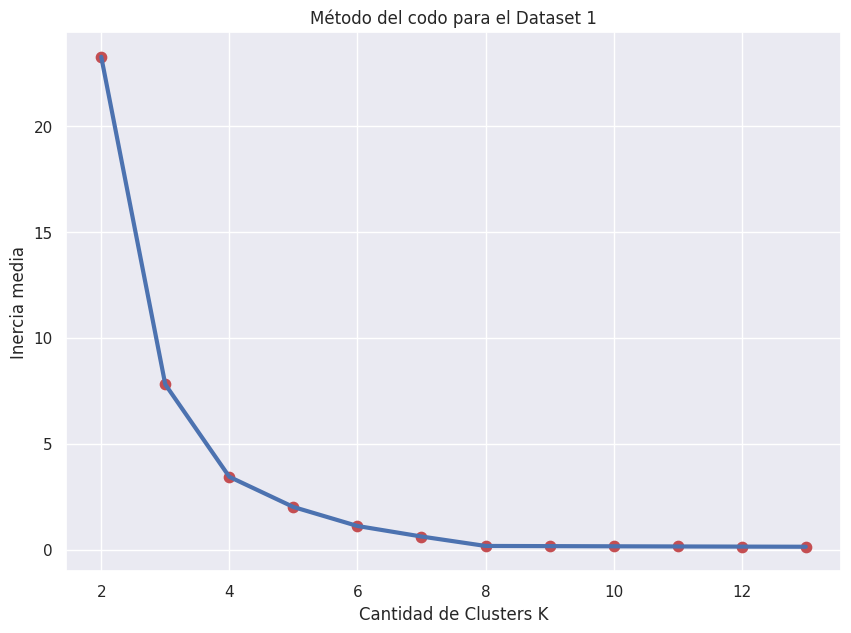

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(K, lista_distancias_medias, lw=3)
plt.scatter(K, lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

5. Repita el gráfico, pero esta vez para los datasets 2 y 3. Recomendamos copiar el código anterior y modificarlo.

6. Usar el criterio para elegir el mejor numero de k en cada caso según la curva y graficar los clusters para cada dataset. Dejamos como ejemplo el dataset 3, donde de la curva tomamos el valor 6 como codo.

In [ ]:
# Defino y entreno el modelo
km = KMeans(n_clusters=6)
km = km.fit(X3)
# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

### 1.2 Silhouette

Vamos a evaluar las particiones que realizamos mediante el valor de silhouette. La idea es que al variar los parámetros de los modelos de clustering, cambiará la distribución del valor de Silhouettes en los datos. Con esa distribución debemos elegir los mejores parametros posibles.

7. Primero vamos a calcular únicamente el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de distancia media, vamos a recorrer con un `for` los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la distancia, vamos a calcular el valor de silhouette usando la función `silhouette_score`. Dejamos como ejemplo lo que sucede para el Dataset 2.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

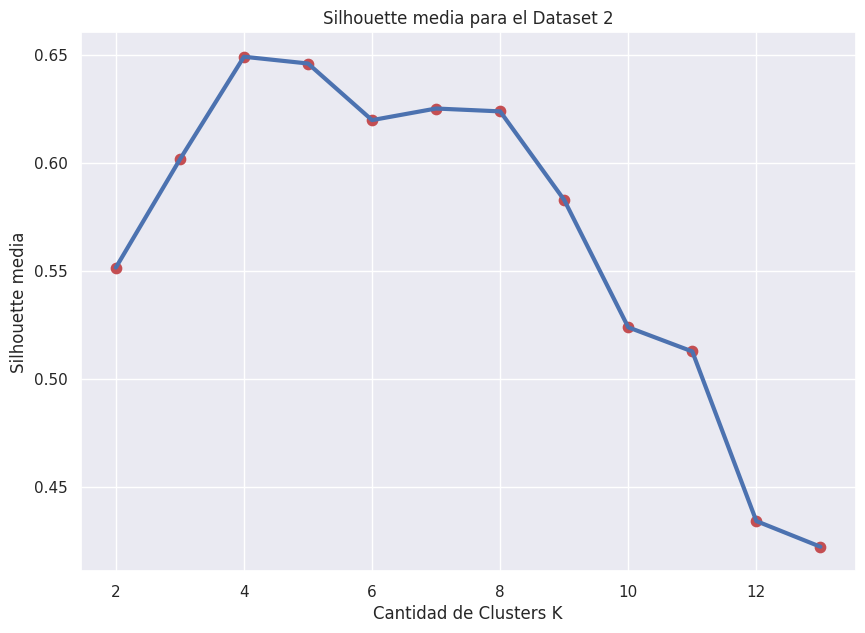

In [ ]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X2)

    # Tomamos las etiquetas
    etiquetas = km.labels_

    # Calculamos el silhouette
    valor_medio_sil = silhouette_score(X2, etiquetas)
    lista_sil.append(valor_medio_sil)

plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

8. Repetir esta curva para los datasets 1 y 3.

9. A modo demostrativo, les dejaremos un bloque de código que genera los gráficos de Silhouette para todas las instancias. Noten que pueden sacar información de qué tan buenas fueron las particiones del perfil de silhouettes de cada cluster. La línea verde punteada indica el valor medio.

In [ ]:
# Aca ponen el Dataset con el que quieren trabajar
X_std = X2
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## 2. ¡A probar con un dataset!

En el encuentro pasado deberías haber aplicado técnicas de clustering sobre un [dataset](https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms/input). ¡Ahora es momento de evaluar tus resultados!
